# Lesson 2: sMRI preprocessing - image cleanup

## Objectives
- Visualize structural MR images (NifTi)

## Python Requirements
- [matplotlib](https://matplotlib.org/)
- [nibabel](https://nipy.org/nibabel/)
- [nilearn](https://nilearn.github.io/index.html)
- [nipype](https://nipype.readthedocs.io/en/0.11.0/index.html) (Optional)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nibabel as nib
import nilearn
from nilearn import datasets
from nilearn import plotting

import os

## Clean-up tasks:
- Bias correction (intensity normalization)
- Brain extraction 

### If you want to run the preprocessing tasks, you will need ANTs and Nipype on your machine. These tasks are computationally demanding so we can skip them at the moment. But you can use the code snippets to try them later! 

## Useful resource:
- https://surfer.nmr.mgh.harvard.edu/fswiki/ReconAllTableStableV5.3

### [Bias correction](https://pythonhosted.org/nipype/interfaces/generated/nipype.interfaces.ants.segmentation.html#n4biasfieldcorrection)
- _Uncomment line below when you have the ANTs + nipype setup ready!_

In [2]:
# import nipype.pipeline.engine as pe                       
# from nipype.interfaces.utility import IdentityInterface
# from nipype.interfaces.ants import N4BiasFieldCorrection
# from nipype.interfaces.io import SelectFiles, DataSink


# my_brain_image = '/path/to/T1.nii.gz'

# n4 = N4BiasFieldCorrection()
# n4.inputs.dimension = 3
# n4.inputs.input_image = my_brain_image
# n4.inputs.bspline_fitting_distance = 300
# n4.inputs.shrink_factor = 3
# n4.inputs.n_iterations = [50,50,30,20]
# n4.inputs.output_image = my_brain_image.replace('.nii.gz', '_N4_corrected_nii.gz')

# n4.run() 

### Compare the original and corrected images
- The example uses Nipype tutorial data and FreeSurfer intermediate outputs

In [3]:
local_data_dir = '/home/nikhil/projects/SDC-BIDS-sMRI/local_data/2_sMRI_cleanup/'

T1_orig = local_data_dir + 'sub001/mri/orig.mgz'
T1_corrected = local_data_dir + 'sub001/mri/nu.mgz'

T1_img_orig = nib.load(T1_orig)
T1_img_corrected = nib.load(T1_corrected)

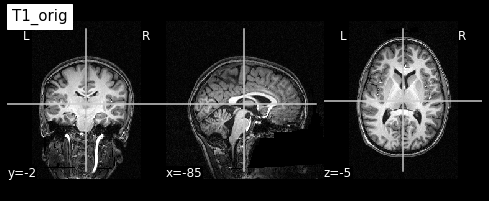

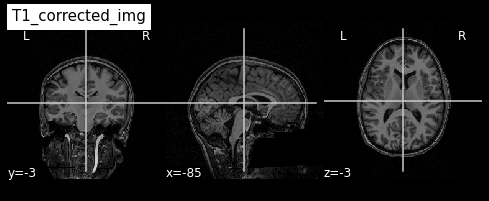

In [4]:
plotting.plot_anat(T1_orig, title="T1_orig", vmax=255)
plotting.plot_anat(T1_corrected, title="T1_corrected_img", vmax=255)

## plot intensity histogram

In [5]:
T1_data_orig = T1_img_orig.get_fdata()
T1_data_corrected = T1_img_corrected.get_fdata()

print("Data shapes, orig: {}, corrected: {}".format(T1_data_orig.shape, T1_data_corrected.shape))

print("Intensity ranges, orig, min:{}, max:{}, corrected, min:{}, max:{}".format(T1_data_orig.min(), T1_data_orig.max(), T1_data_corrected.min(), T1_data_corrected.max()))

# non_zero
T1_data_orig = T1_data_orig.ravel()
T1_data_orig = T1_data_orig[np.nonzero(T1_data_orig)]

T1_data_corrected = T1_data_corrected.ravel()
T1_data_corrected = T1_data_corrected[np.nonzero(T1_data_corrected)]


Data shapes, orig: (256, 256, 256), corrected: (256, 256, 256)
Intensity ranges, orig, min:0.0, max:255.0, corrected, min:0.0, max:206.0


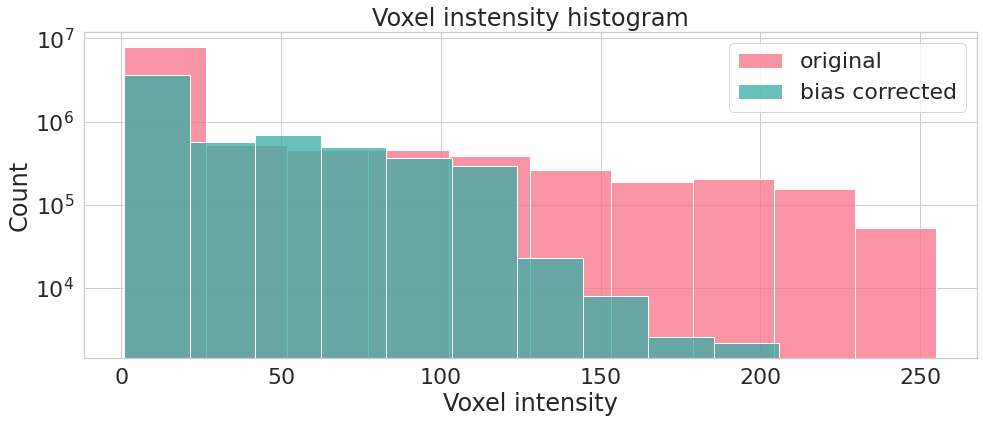

In [6]:
sns.set_context("notebook", font_scale=2, rc={"lines.linewidth": 2.5})

palette = sns.color_palette("husl", 2)

with sns.axes_style("whitegrid"):
    plt.figure(figsize=(16, 6))
    g = sns.histplot(T1_data_orig, bins=10, kde=False, color=palette[0], log_scale=(False, True), label='original')
    g = sns.histplot(T1_data_corrected,bins=10, kde=False, color=palette[1], log_scale=(False, True), label='bias corrected')

    plt.legend()
    plt.xlabel('Voxel intensity')
    plt.title('Voxel instensity histogram')

## Exercise

### Plotting Bias field
- Note that the bias is NOT additive (i.e. The intensity at each voxel is divided by the estimated bias field at that location).

In [7]:
T1_data_orig = T1_img_orig.get_fdata()
T1_data_corrected = T1_img_corrected.get_fdata()

bias_field = T1_data_orig / (T1_data_corrected)
bias_field[np.isnan(bias_field)] = 0 # place holders 
bias_field[bias_field == np.inf] = 0 # place holders 

print('Bias field magnitude, min: {}, max: {}'.format(bias_field.min(), bias_field.max()))
bias_field_img = nib.Nifti1Image(bias_field, T1_img_orig.affine)

Bias field magnitude, min: 0.0, max: 13.0


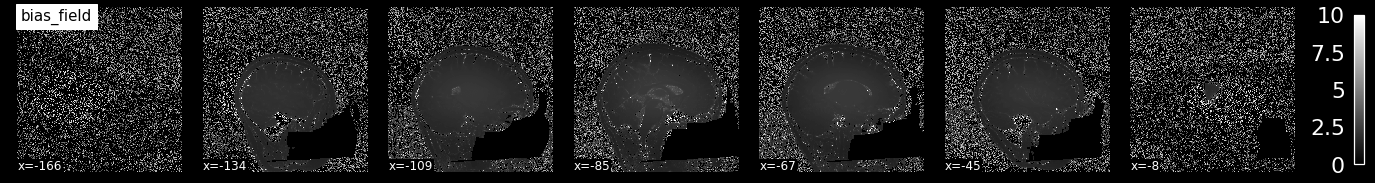

In [8]:
plotting.plot_anat(bias_field_img, title="bias_field", vmax=10, colorbar=True, display_mode='x')